In [2]:
from manim import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from artemutils.colormaps import get_colormap
from numpy.random import default_rng

plt.rcParams['svg.fonttype'] = 'none'
# Use TeX
plt.rcParams['text.usetex'] = False

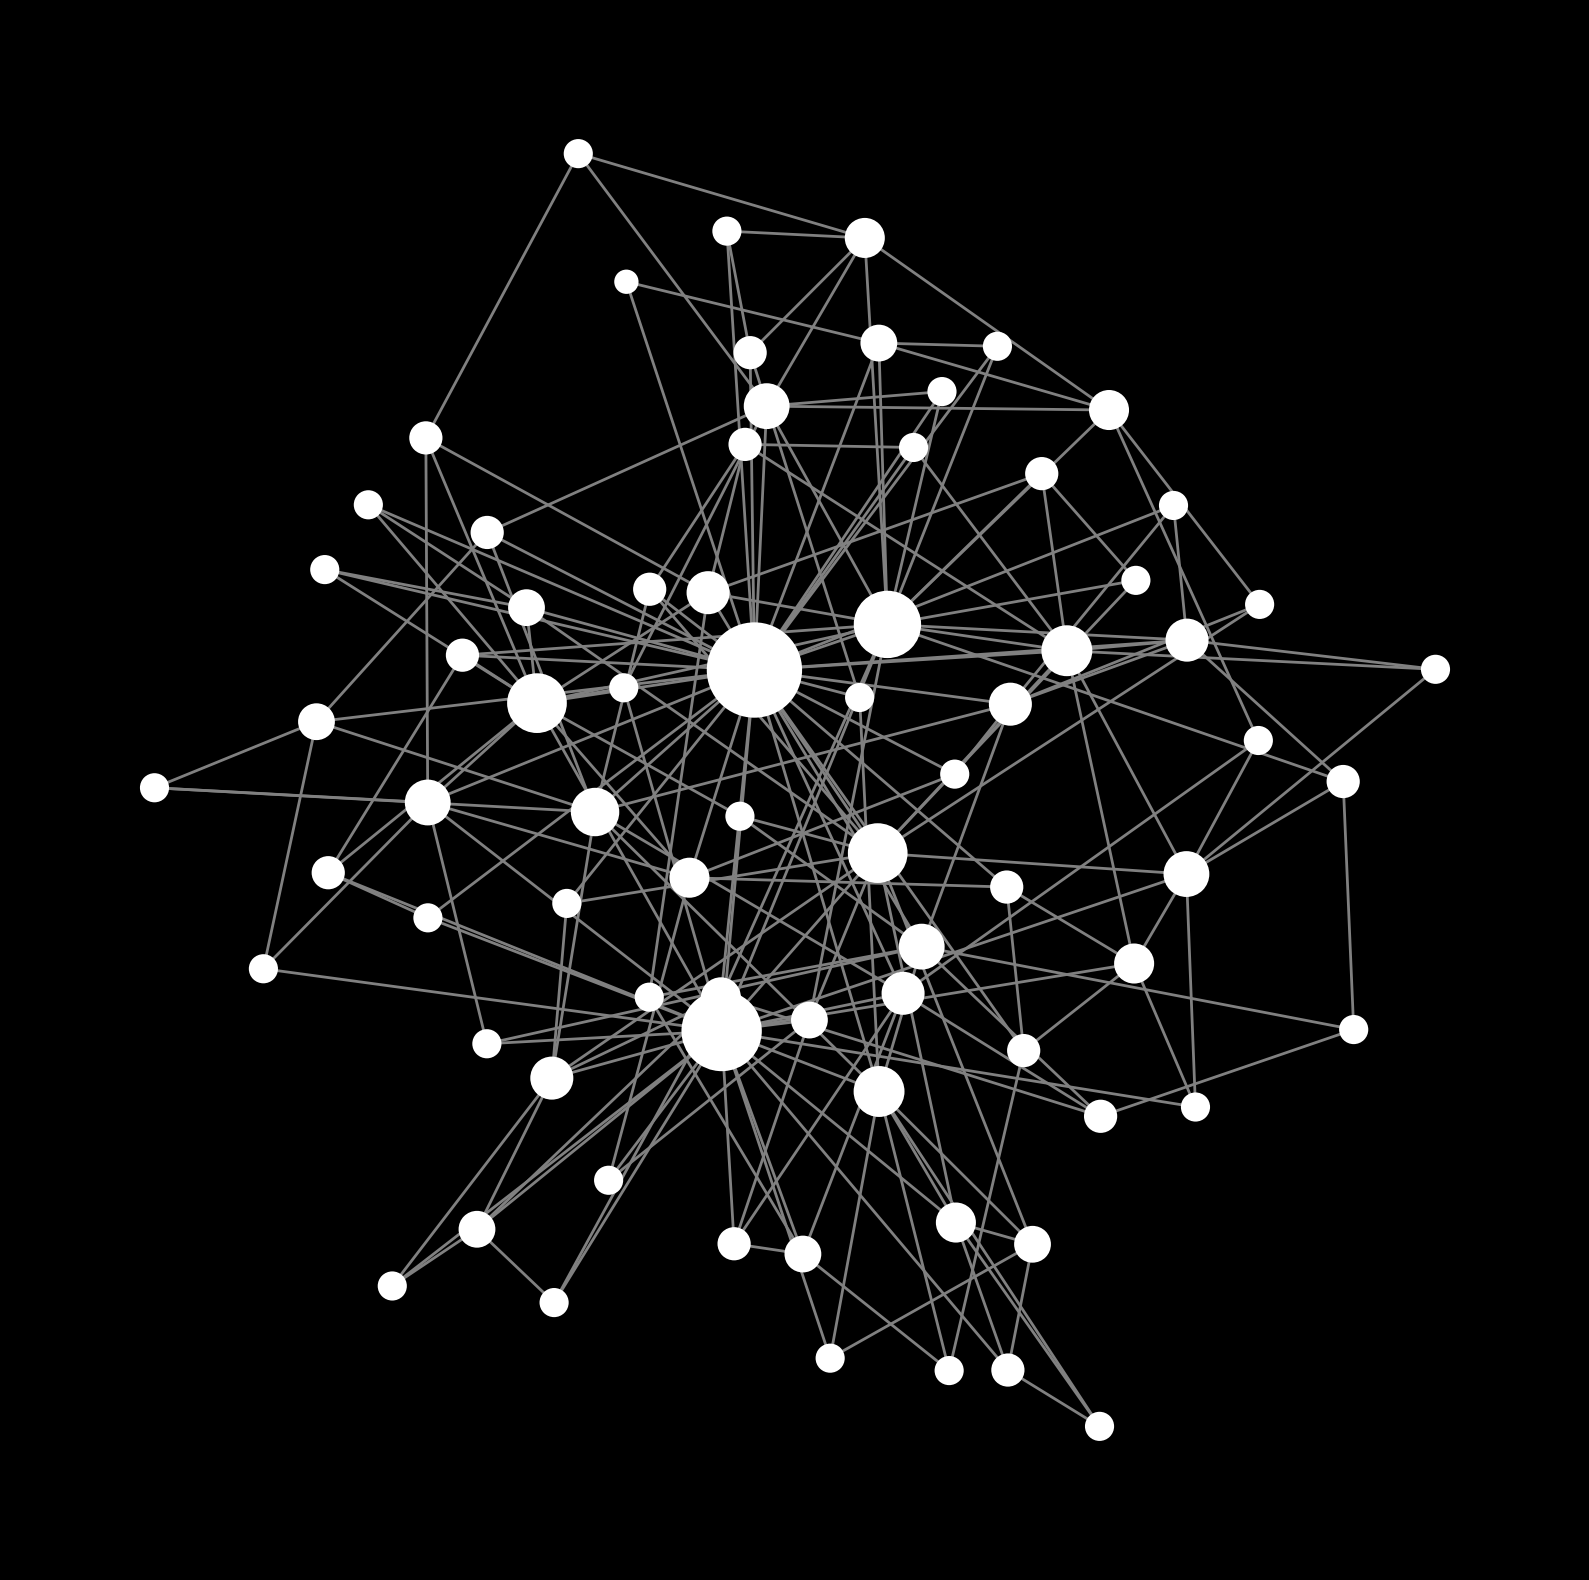

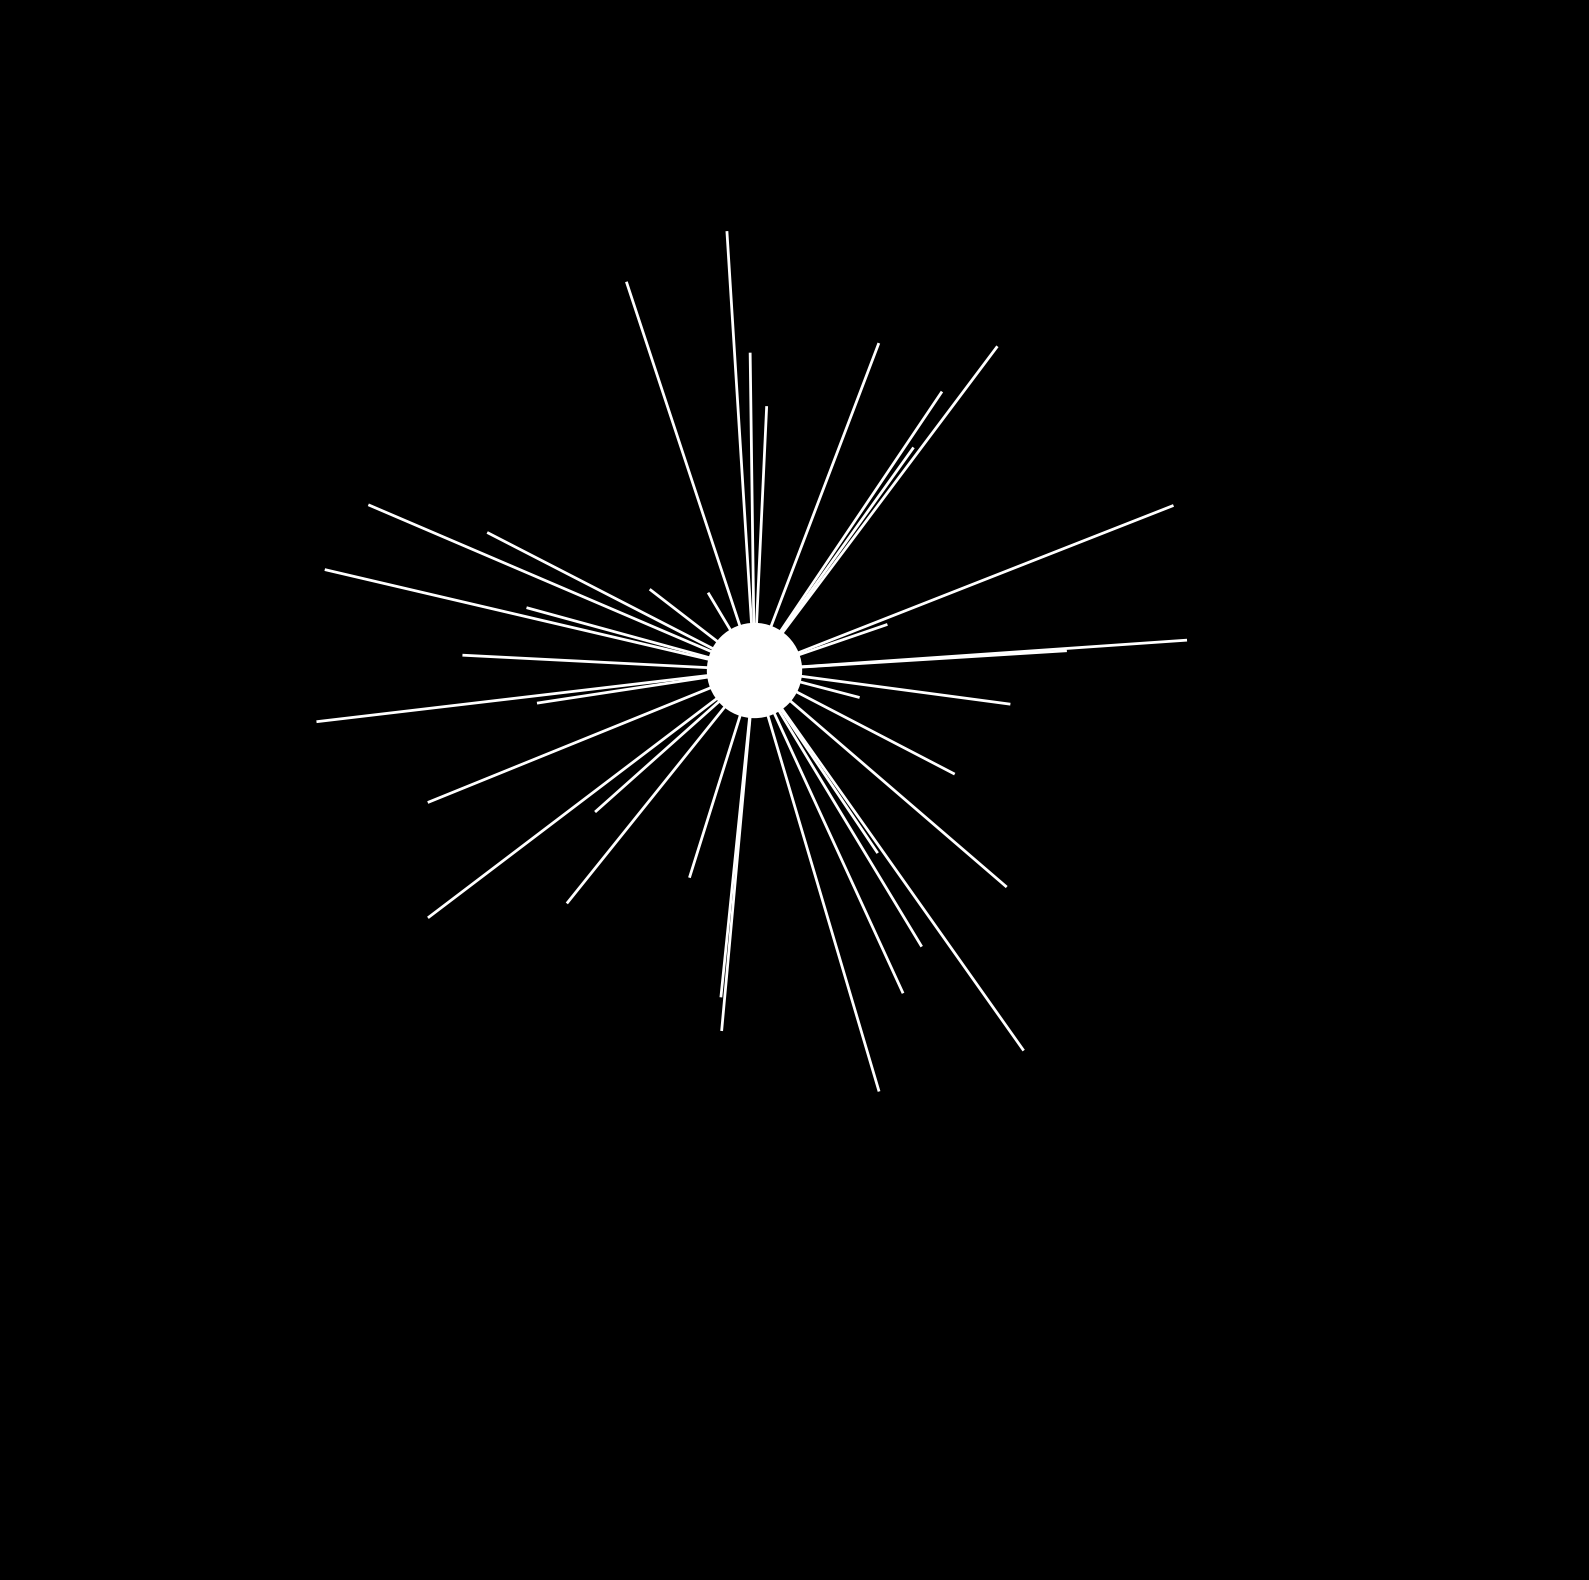

In [18]:
G = nx.powerlaw_cluster_graph(n=75, m=3, p=0.6, seed=42)
pos = nx.spring_layout(G, k=1/np.sqrt(len(G)), iterations=50, seed=42)
fig, ax = plt.subplots(1,1, figsize=(10,10) , dpi=200)

# --- Full graph
nx.draw(G, pos, 
        node_color='white',
        node_size=[G.degree(n) * 30 for n in G.nodes()],  # size nodes by degree
        with_labels=False, ax=ax, edge_color='gray', width=1)
fig.patch.set_color('black')
ax.set_facecolor('black')

fig.savefig('graph.png', transparent=True)


# Only hub node (highest degree) and its edges
hub_node = max(G.degree, key=lambda x: x[1])
hub_node = hub_node[0]
hub_edges = list(G.edges(hub_node))

fig, ax = plt.subplots(1,1, figsize=(10,10) , dpi=200)
# Draw the graph in black to ensure axes limits are the same
nx.draw(G, pos, 
        node_color='black',
        node_size=[G.degree(n) * 30 for n in G.nodes()],  # size nodes by degree
        with_labels=False, ax=ax, edge_color='black', width=0, alpha=0)



nx.draw_networkx_nodes(G, pos, nodelist=[hub_node], node_color='white', node_size=G.degree(hub_node) * 30)
nx.draw_networkx_edges(G, pos, edgelist=hub_edges, edge_color='white', width=1)
fig.patch.set_color('black')
ax.set_facecolor('black')
fig.savefig('hub.png', transparent=True)


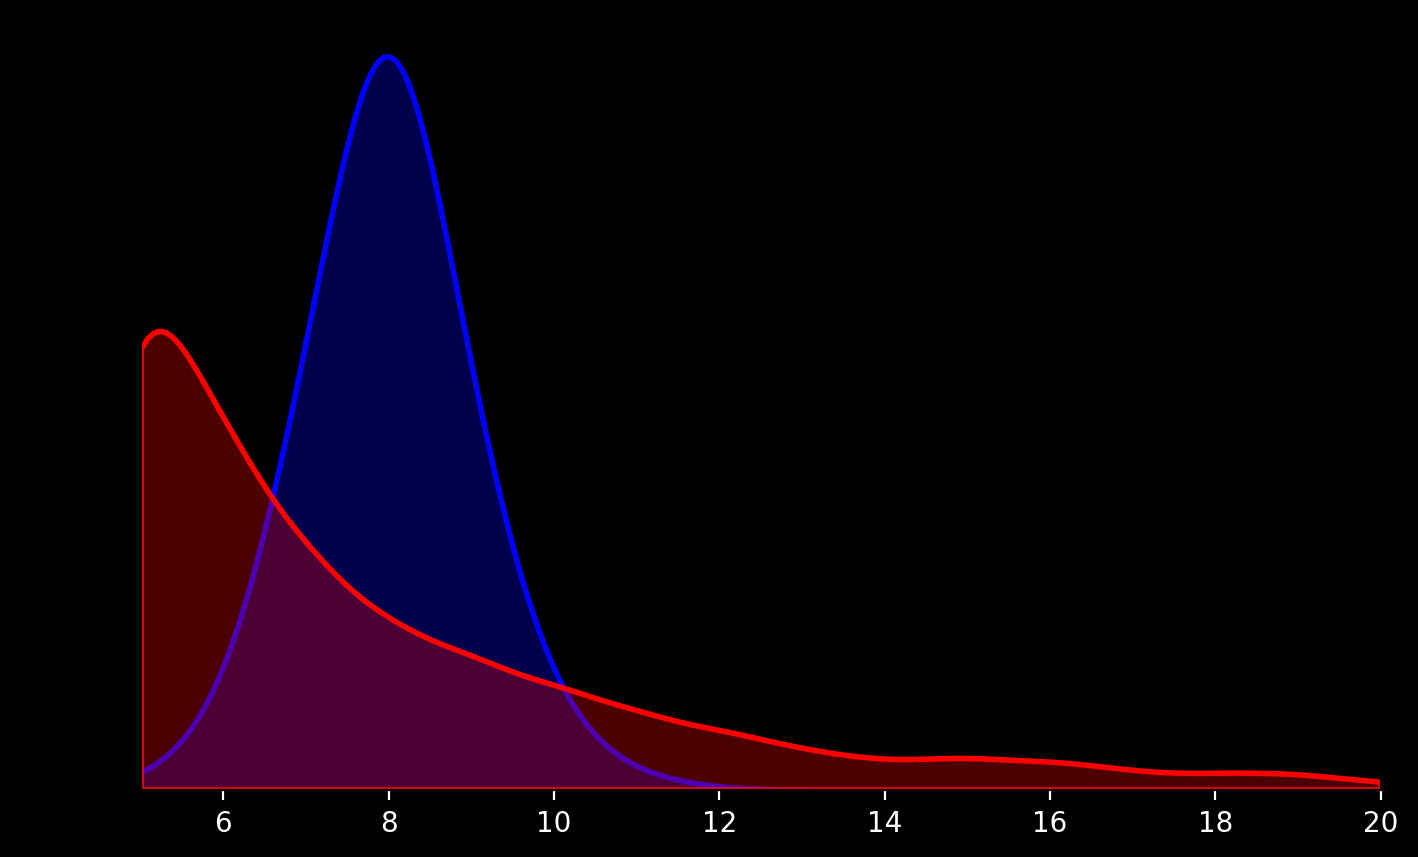

In [91]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=200)
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

G1 = nx.watts_strogatz_graph(1000, k=9, p=0.1, seed=4)
degrees1 = np.array([d for n, d in G1.degree()])
degrees_jittered = degrees1 + np.random.normal(0, 0.1, len(degrees1))


G2 = nx.powerlaw_cluster_graph(1000, 5, p=1, seed=55)
degrees2 = np.array([d for n, d in G2.degree()])
degrees_jittered2 = degrees2 + np.random.normal(0, 0.1, len(degrees2))

# Plot with adjusted bandwidth
sns.kdeplot(
    degrees_jittered, 
    color='blue', 
    ax=ax, 
    linewidth=2,
    fill='blue', 
    alpha=0.3,
    label='Watts-Strogatz',
    bw_adjust=3  # Adjust this value to control smoothness
)

sns.kdeplot(
    degrees_jittered2[degrees_jittered2 <= 20],
    color='red', 
    ax=ax, 
    linewidth=2,
    fill='red', 
    alpha=0.3,
    label='Powerlaw',
    clip=(5, 20),
    bw_adjust=0.7
)

ax.tick_params(axis='x', colors='white')

ax.set_xlim(5, 20)
fig.savefig('degree_distribution.svg', transparent=True)